# Titanic 

In [77]:
# Import libraries and Data Set
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
%matplotlib inline

# Data Set from Titanic https://www.kaggle.com/c/titanic/data
df = pd.read_csv('train.csv')

In [78]:
#pip install missingno

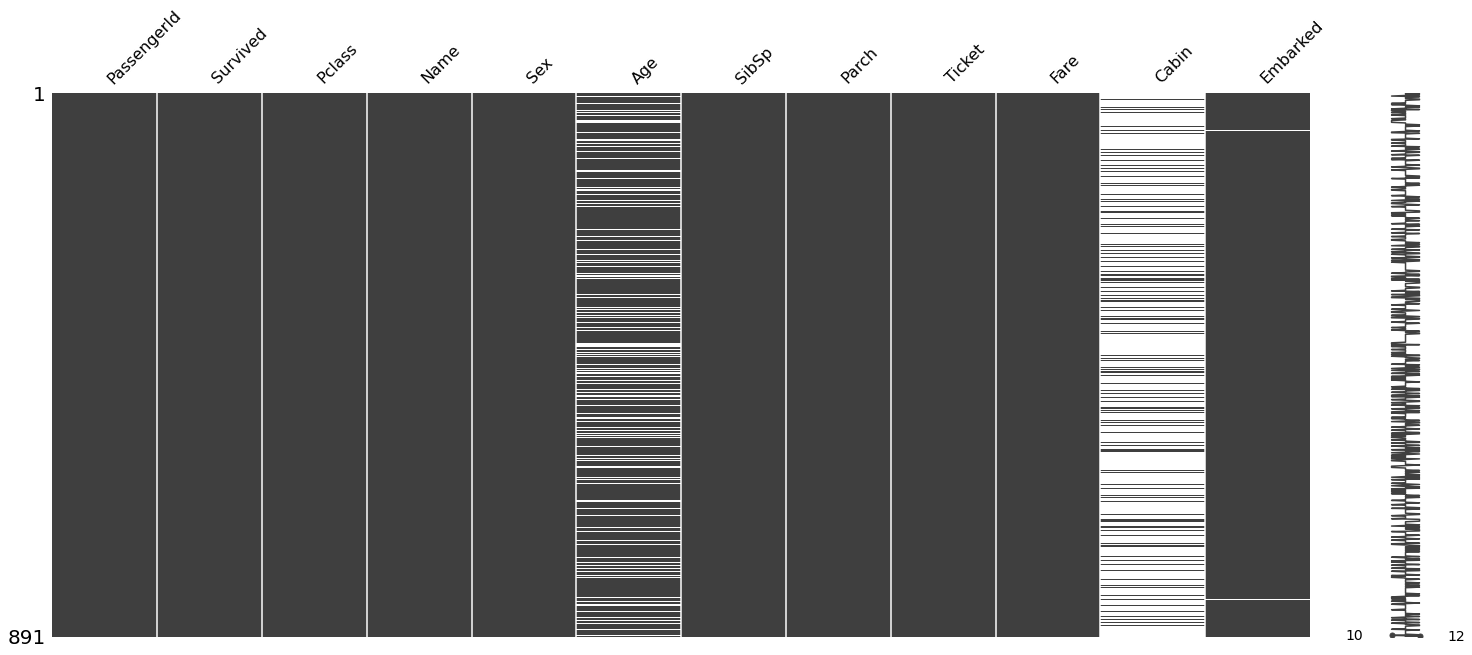

In [79]:
# Show missing value using msno mtrix: White = Missing
msno.matrix(df);

In [80]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [82]:
df.shape

(891, 12)

In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [86]:
df = df[df["Embarked"].notna()] # ~isnull. equal notna() # Removed missing row from Embarked

In [87]:
df.shape

(889, 12)

In [88]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [89]:
df["Cabin"] = df["Cabin"].fillna("¯\(ツ)/¯")

In [90]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [91]:
df["Name"].str.contains("Cap").sum()

1

In [92]:
#print(df["Name"])

In [93]:
# Sum of family members are on the boat for a given person: Sum of number of SibSp(siblings/spouses) and Parch(parents/childrens) columns
df["FamilyCount"] = df["SibSp"]+df["Parch"]

In [94]:
#df.tail()

In [95]:
def is_reverend(value):
    strings = value.split()
    if 'Rev.' in str(strings):
        return 1
    else:
        return 0

In [96]:
df["IsReverend"] = df['Name'].apply(is_reverend)

In [97]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,¯\(ツ)/¯,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,¯\(ツ)/¯,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,¯\(ツ)/¯,Q,0,0


In [98]:
df = pd.concat([df, pd.get_dummies(df["Embarked"], prefix = 'Embarked')], axis = 1)

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1


In [100]:
df = pd.concat([df, pd.get_dummies(df["Sex"], prefix = 'is')], axis = 1)

In [101]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,is_female,is_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1


In [102]:
df[["is_female","is_male"]].mean()

is_female    0.350956
is_male      0.649044
dtype: float64

In [103]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,is_female,is_male
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,0.906637,0.006749,0.188976,0.086614,0.724409,0.350956,0.649044
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504,1.614703,0.081922,0.391710,0.281427,0.447063,0.477538,0.477538
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
# 
df.groupby("Sex")["Survived"].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

The average survival rate is 38.25% for all passengers. Female Survival rate is at 74.04% which is significantly higher than average. Male Survival rate is at 18.89%.

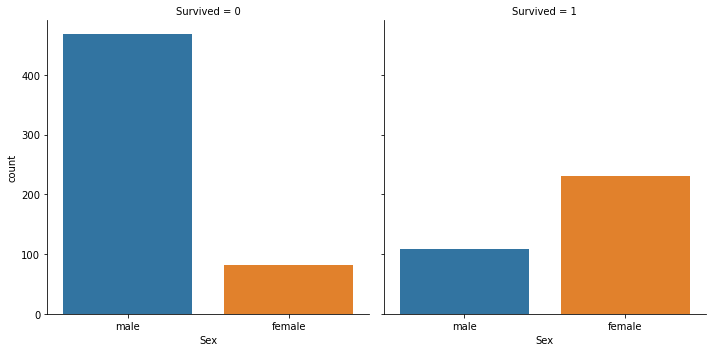

In [105]:
# Counts of people who survived by Sex

sns.catplot(x="Sex", col="Survived", data=df, kind="count");

In [106]:
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

The average survival rate is 38.25% for all passengers. 1st Class passengers' survival rate is at 62.62% which is significantly higher than average.2nd Class passengers' survival rate is at 47.28%. 3rd Class survival rate is at 24.24%

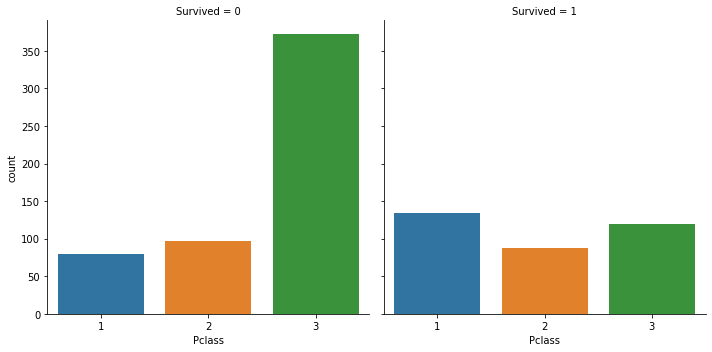

In [107]:
# Counts of people who survived by Sex

sns.catplot(x="Pclass", col="Survived", data=df, kind="count");

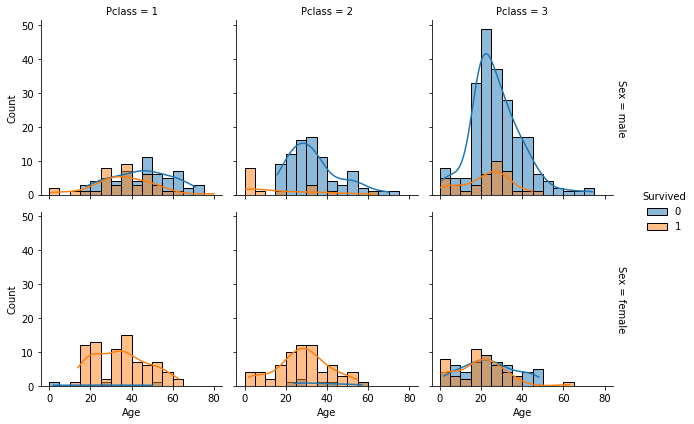

In [108]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(df, row='Sex', col='Pclass', hue='Survived', margin_titles=True)
g.map(sns.histplot, 'Age', kde=True, bins=bins)
g.add_legend()  
plt.show()  

The grid shows the number according to these conditions: Row for Sex and Column for Ticket class.
The graphs show the number of people who survived in orange compared with the number of people who did not in blue. 
The top row shows the number of male passengers. The bottom row shows the number of female passengers. 
The left column shows the number of passengers in first class.
The top left column shows the number of male passengers in first class.
Most passengers are male in the third class with the highest likely to perish.

In [109]:
df.groupby("IsReverend")["Survived"].mean()

IsReverend
0    0.385051
1    0.000000
Name: Survived, dtype: float64

No reverend survives the titanic.

In [110]:
#df[df['Cabin'].str.contains('¯\(ツ)/¯')]["Survived"].mean()

In [111]:
df.groupby("Cabin")["Survived"].mean()

Cabin
A10        0.000000
A14        0.000000
A16        1.000000
A19        0.000000
A20        1.000000
             ...   
F38        0.000000
F4         1.000000
G6         0.500000
T          0.000000
¯\(ツ)/¯    0.299854
Name: Survived, Length: 147, dtype: float64

The survival of passengers marked as ¯\(ツ)/¯ (missing) is 29.99%.

In [112]:
#df.groupby("Age")["Survived"].mean()

In [113]:
df["AgeNull"]= pd.isnull(df["Age"])

In [114]:
age =df.groupby(["AgeNull"])

In [115]:
df.groupby(["AgeNull"])["Survived"].mean()

AgeNull
False    0.404494
True     0.293785
Name: Survived, dtype: float64

29.38% of people who age is missing survived compared to 40.45% of people with age data survive. This can be intrepreted as data are more complete for survivors.

In [116]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,is_female,is_male,AgeNull
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1,False


The survival of passengers who age is missing is 29.38%.

In [117]:
#What is the survival rate for each port of embarkation?


c_mask = [passenger == 1 for passenger in df.Embarked_C]
q_mask = [passenger == 1 for passenger in df.Embarked_Q]
s_mask = [passenger == 1 for passenger in df.Embarked_S]

c_survival = [c for index, c in enumerate(df.Survived) if c_mask[index]]
c_survival = np.array([c_survival])
c_survival_rate = (c_survival.sum() / np.count_nonzero(c_mask)*100)
print(f"The survival rate for embarking from Cherbourg was: {c_survival_rate}%")

The survival rate for embarking from Cherbourg was: 55.35714285714286%


In [118]:
#c_survival_rate

In [119]:
q_survival = [q for index, q in enumerate(df.Survived) if q_mask[index]]
q_survival = np.array([q_survival])
q_survival_rate = (q_survival.sum() / np.count_nonzero(q_mask)*100)
print(f"The survival rate for embarking from Queenstown was: {q_survival_rate}%")

The survival rate for embarking from Queenstown was: 38.961038961038966%


In [120]:
#q_survival_rate

In [121]:
s_survival = [s for index, s in enumerate(df.Survived) if s_mask[index]]
s_survival = np.array([s_survival])
s_survival_rate = (s_survival.sum() / np.count_nonzero(s_mask)*100)
print(f"The survival rate for embarking from Southampton was: {s_survival_rate}%")

The survival rate for embarking from Southampton was: 33.69565217391305%


In [122]:
#s_survival_rate

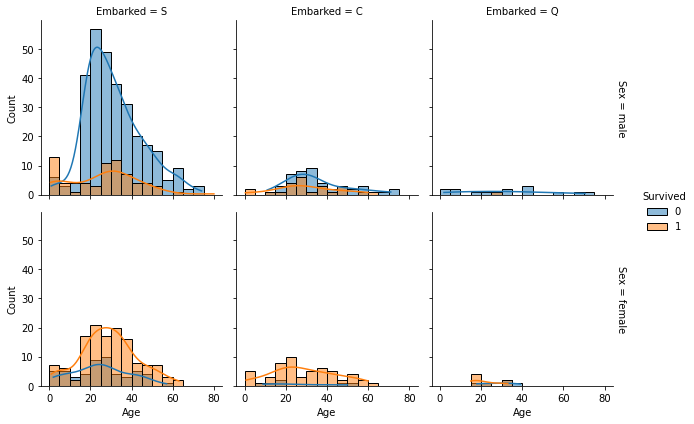

In [123]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(df, row='Sex', col='Embarked', hue='Survived', margin_titles=True)
g.map(sns.histplot, 'Age', kde=True, bins=bins)
g.add_legend()  
plt.show()  

People embarking from Cherbourg seems to have higher survival rates due to higher proportions of females.
People embarking from Southampton seems to have lower survival rates due to higher proportions of males.

In [124]:
(df.groupby(['Embarked', 'Sex'], as_index=False).mean()
            .groupby('Pclass')['Survived'].mean())

Pclass
1.726027    0.876712
2.010526    0.305263
2.197044    0.689655
2.421769    0.174603
2.888889    0.750000
2.926829    0.073171
Name: Survived, dtype: float64

In [125]:
df.groupby(['Embarked', 'Sex']).size()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
dtype: int64

In [126]:
df.groupby(['Embarked', 'Sex']).mean()

PassengerId  Survived    Pclass        Age     SibSp  \
Embarked Sex                                                            
C        female   437.315068  0.876712  1.726027  28.344262  0.547945   
         male     451.536842  0.305263  2.010526  32.998841  0.263158   
Q        female   374.138889  0.750000  2.888889  24.291667  0.222222   
         male     456.317073  0.073171  2.926829  30.937500  0.609756   
S        female   438.709360  0.689655  2.197044  27.771505  0.837438   
         male     454.507937  0.174603  2.421769  30.291440  0.448980   

                    Parch       Fare  FamilyCount  IsReverend  Embarked_C  \
Embarked Sex                                                                
C        female  0.493151  75.169805     1.041096    0.000000         1.0   
         male    0.263158  48.262109     0.526316    0.000000         1.0   
Q        female  0.222222  12.634958     0.444444    0.000000         0.0   
         male    0.121951  13.838922     0.731707    0.024390         0.0   
S        female  0.788177  38.740929     1.625616    0.000000         0.0   
         male    0.240363  21.711996     0.689342    0.011338         0.0   

                 Embarked_Q  Embarked_S  is_female  is_male   AgeNull  
Embarked Sex                                                           
C        female         0.0         0.0        1.0      0.0  0.164384  
         male           0.0         0.0        0.0      1.0  0.273684  
Q        female         1.0         0.0        1.0      0.0  0.666667  
         male           1.0         0.0        0.0      1.0  0.609756  
S        female         0.0         1.0        1.0      0.0  0.083744  
         male           0.0         1.0        0.0      1.0  0.165533

People embarking from Cherbourg seems to have higher survival rates due to higher proportions of female.

In [127]:
np.count_nonzero(c_mask)

168

In [128]:
len(df["Survived"])

889

In [129]:
# What is the survival rate for children (under 12) in each Pclass
# Create new dataframe of children under 12 by filter then group by
df_u12 = df[df['Age'] < 12]
survival_rate_by_PClass_u12 = df_u12.groupby('Pclass')['Survived'].sum()/df_u12.groupby('Pclass')['PassengerId'].count() * 100
survival_rate_by_PClass_u12

Pclass
1     75.000000
2    100.000000
3     40.425532
dtype: float64

In [130]:
df_u12.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,is_female,is_male
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0,68.000000,68.000000,68.000000,68.000000,68.000000
mean,436.941176,0.573529,2.632353,4.664265,1.882353,1.426471,31.834803,3.308824,0.0,0.147059,0.058824,0.794118,0.470588,0.529412
std,278.794788,0.498241,0.596117,3.297692,1.643889,0.554928,26.504422,1.838700,0.0,0.356798,0.237044,0.407351,0.502845,0.502845
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,8.516700,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,0.000000,2.000000,2.000000,0.750000,1.000000,19.140600,2.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
50%,433.000000,1.000000,3.000000,4.000000,1.000000,1.000000,27.825000,3.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000
75%,723.750000,1.000000,3.000000,8.000000,4.000000,2.000000,31.790625,5.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000
max,870.000000,1.000000,3.000000,11.000000,5.000000,2.000000,151.550000,7.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
df_u12.groupby('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,4.0,0.750000,0.500000,0.0,0.75,1.0,1.0,1.0
2,17.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
3,47.0,0.404255,0.496053,0.0,0.00,0.0,1.0,1.0


The survival rate for children under 12 is 57.35% for all children under 12.
1st Class childrens' survival rate is at 75.00% 
2nd Class childrens' survival rate is at 100.00%. 
3rd Class childrens' survival rate is at 40.43%

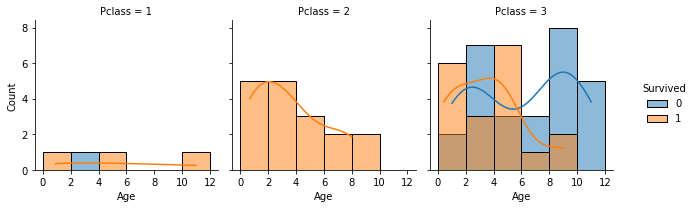

In [132]:
# Plot histogram for children under 12
ticks = range(0,14,2)
g = sns.FacetGrid(df_u12, col='Pclass', hue='Survived', margin_titles=True)
g.map(sns.histplot, 'Age', kde=True, binwidth=2, binrange=(0, 12))
g.add_legend()
plt.xticks(ticks)
plt.show()  

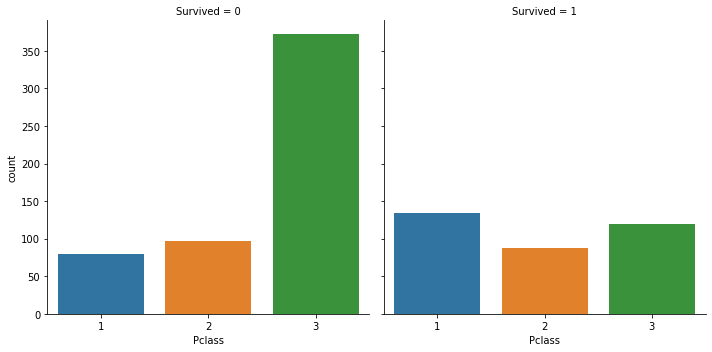

In [133]:
# Counts of people who survived

sns.catplot(x="Pclass", col="Survived", data=df, kind="count");

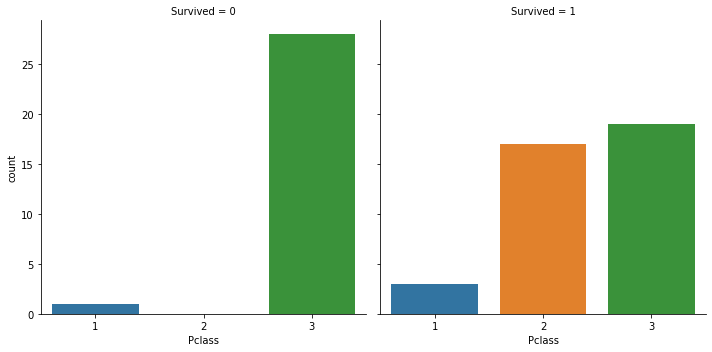

In [134]:
# Counts of children under 12 who survived
sns.catplot(x="Pclass", col="Survived", data=df_u12, kind="count");

In [135]:
# Check for Captain's information
df[df["Name"].str.contains("Cap")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,is_female,is_male,AgeNull
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1,0,1,False


The captain of the ship was not on the list. From further research, Captain Edward John Smith went down with the ship.

https://en.wikipedia.org/wiki/Edward_Smith_(sea_captain)

In [136]:
# The most expensive ticket
most_spend = df.sort_values(by=['Fare', 'Survived'], ascending=False)

In [137]:
most_spend.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,is_female,is_male,AgeNull
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,¯\(ツ)/¯,C,0,0,1,0,0,1,0,False
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,0,1,0,0,0,1,False
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0,0,1,0,0,0,1,False
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,5,0,0,0,1,1,0,False
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,5,0,0,0,1,1,0,False


In [138]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
dead_spender = most_spend[most_spend['Survived'] == 0].head(1)
dead_spender_name = dead_spender["Name"]
dead_spender_fare = dead_spender["Fare"]
dead_spender

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,is_female,is_male,AgeNull
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1,0,1,False


In [139]:
print("Of all the people that died, Mr. Charles Alexander had the most expensive ticket at 263.0");

Of all the people that died, Mr. Charles Alexander had the most expensive ticket at 263.0


In [140]:
#Does having family on the boat help or hurt your chances of survival?

fam = df.sort_values(by='FamilyCount', ascending=False)
fam.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,is_female,is_male,AgeNull
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0,0,0,1,0,1,True
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0,0,0,1,1,0,True
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0,0,0,1,0,1,True
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0,0,0,1,0,1,True
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0,0,0,1,1,0,True


In [141]:
# Does having family on the boat help or hurt your chances of survival?
df.groupby('FamilyCount')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
FamilyCount,,,,,,,,
0,535.0,0.300935,0.459094,0.0,0.0,0.0,1.0,1.0
1,161.0,0.552795,0.498756,0.0,0.0,1.0,1.0,1.0
2,102.0,0.578431,0.496249,0.0,0.0,1.0,1.0,1.0
3,29.0,0.724138,0.454859,0.0,0.0,1.0,1.0,1.0
4,15.0,0.200000,0.414039,0.0,0.0,0.0,0.0,1.0
5,22.0,0.136364,0.351250,0.0,0.0,0.0,0.0,1.0
6,12.0,0.333333,0.492366,0.0,0.0,0.0,1.0,1.0
7,6.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
10,7.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [142]:
family = df[df['FamilyCount'] >= 1]
survival_rate_by_family = family['Survived'].sum()/family['Survived'].count() * 100
print(f" The survival of passengers with family is {round(survival_rate_by_family,2)}% which is significantly higher than 30.09% of passengers without family member on board.")

 The survival of passengers with family is 50.56% which is significantly higher than 30.09% of passengers without family member on board.


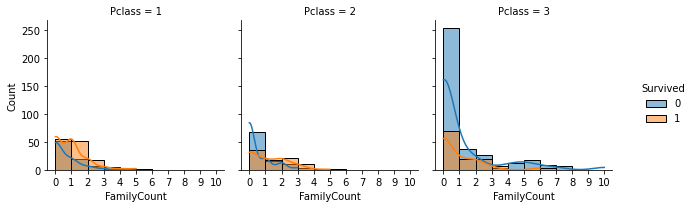

In [143]:
ticks = range(0,11,1)
bins = np.arange(0,10,1)
g = sns.FacetGrid(df, col='Pclass', hue='Survived', margin_titles=True)
g.map(sns.histplot, 'FamilyCount', kde=True, bins=bins)
g.add_legend() 
plt.xticks(ticks)
plt.show()  

The survival of passenger with family are more likely affect by the class as there are significant number of people with family who did not survive in the third class. Moreover, most of the number of passengers without family member on board are from third class.

In [144]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,is_female,is_male,AgeNull
PassengerId,1.000000,-0.005028,-0.035330,0.033681,-0.057686,-0.001657,0.012703,-0.040258,0.012730,-0.001208,-0.033694,0.022269,-0.043136,0.043136,-0.020223
Survived,-0.005028,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290,0.018277,-0.064871,0.169966,0.004536,-0.151777,0.541585,-0.541585,-0.090967
Pclass,-0.035330,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193,0.064221,-0.030788,-0.245733,0.220558,0.076466,-0.127741,0.127741,0.171701
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,-0.300699,0.086089,0.038268,-0.021693,-0.025431,-0.099037,0.099037,NaN
SibSp,-0.057686,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887,0.890654,-0.026717,-0.060074,-0.026692,0.069438,0.116348,-0.116348,0.018436
Parch,-0.001657,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532,0.782988,-0.022061,-0.011588,-0.081585,0.061512,0.247508,-0.247508,-0.124701
Fare,0.012703,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000,0.218658,-0.022876,0.270731,-0.116684,-0.163758,0.179958,-0.179958,-0.099761
FamilyCount,-0.040258,0.018277,0.064221,-0.300699,0.890654,0.782988,0.218658,1.000000,-0.029284,-0.046852,-0.059007,0.078197,0.203191,-0.203191,-0.049703
IsReverend,0.012730,-0.064871,-0.030788,0.086089,-0.026717,-0.022061,-0.022876,-0.029284,1.000000,-0.039791,0.023461,0.020095,-0.060616,0.060616,-0.041100
Embarked_C,-0.001208,0.169966,-0.245733,0.038268,-0.060074,-0.011588,0.270731,-0.046852,-0.039791,1.000000,-0.148646,-0.782613,0.084520,-0.084520,0.032747


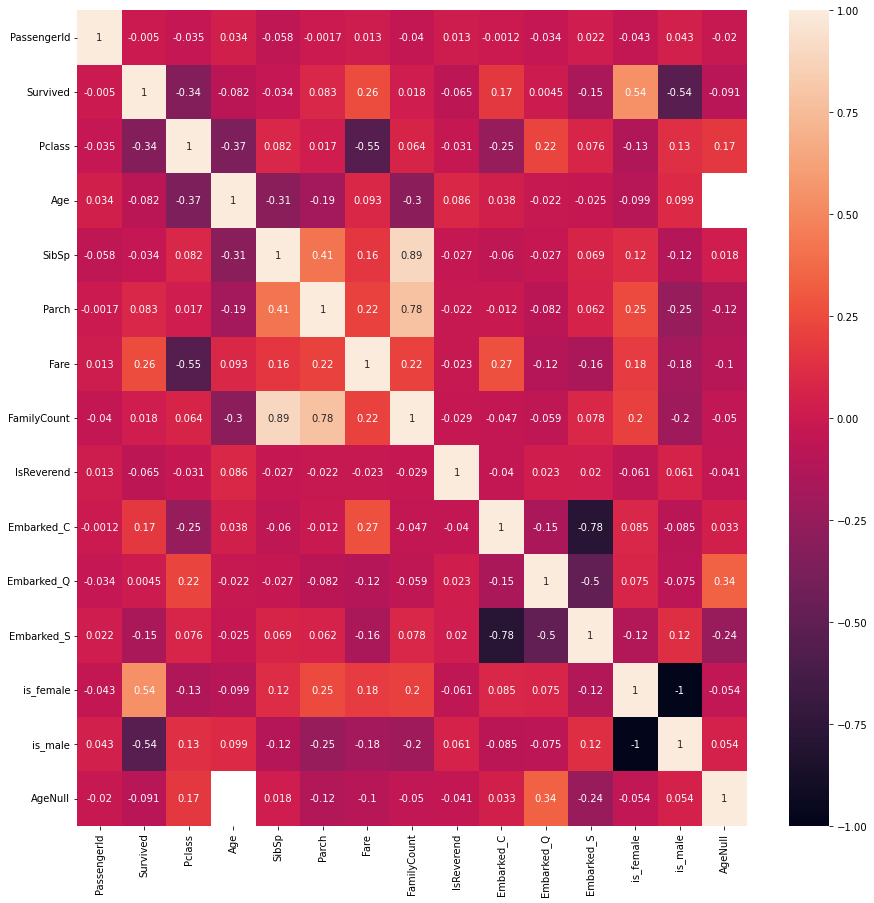

In [145]:
fig, ax = plt.subplots(figsize=(15,15))
plt.xticks(rotation = 45)
sns.heatmap(df.corr(), annot = True);

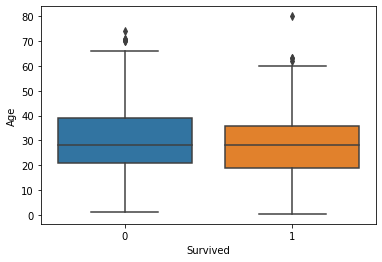

In [146]:
sns.boxplot(x="Survived", y="Age", data = df);

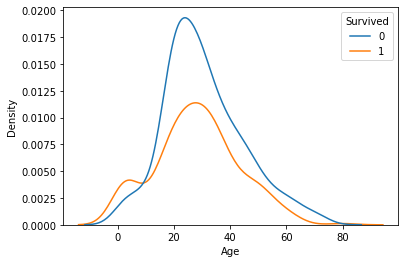

In [147]:
sns.kdeplot(x = "Age", data = df, hue = "Survived");

People who survived tends to be younger.

In [148]:
survived = df[df["Survived"] == 1]

In [149]:
survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,is_female,is_male
count,340.000000,340.0,340.000000,288.000000,340.000000,340.000000,340.000000,340.000000,340.0,340.000000,340.000000,340.000000,340.000000,340.000000
mean,444.358824,1.0,1.955882,28.193299,0.476471,0.467647,48.209498,0.944118,0.0,0.273529,0.088235,0.638235,0.679412,0.320588
std,251.377692,0.0,0.862763,14.859146,0.709838,0.773156,66.748773,1.187370,0.0,0.446427,0.284055,0.481219,0.467391,0.467391
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,254.250000,1.0,1.000000,19.000000,0.000000,0.000000,12.443750,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000
75%,650.500000,1.0,3.000000,36.000000,1.000000,1.000000,56.946900,2.000000,0.0,1.000000,0.000000,1.000000,1.000000,1.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200,6.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
dead = df[df["Survived"] == 0]

In [151]:
dead.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,is_female,is_male
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887,0.883424,0.010929,0.136612,0.085610,0.777778,0.147541,0.852459
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207,1.830669,0.104064,0.343751,0.280043,0.416119,0.354968,0.354968
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


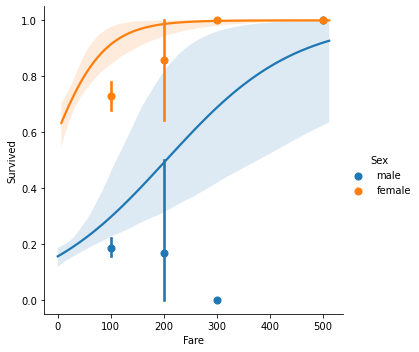

In [152]:
#Regression of fare of the change of survival by sex
tiers = [100,200,300,400,500]
sns.lmplot(x="Fare",y= "Survived", data = df, hue = "Sex", logistic=True, x_bins=tiers, truncate=True);

There is a clear possitive correlation between fare and survival rate for men. Women are more likely to survive regardless of the level of fare.